### WORLD CRIME RATE ANALYSIS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading data from csv file using pandas
crime = pd.read_csv('C:/Users/rajad/Desktop/World Crime Index .csv')
#now lets take a look at the data, what all information it contains
crime.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


##### So, we can see the dataset comprises of the crime index of various cities. Let’s see the shape of the data using the shape. 

In [7]:
crime.shape

(453, 4)

So, there are 453 rows and 4 columns in our data set. The 4 columns, as we know are those of rank, city, crime index and safety index, and there are 453 cities given to us in the dataset. Let’s get a quick summary of the dataset using the describe() method.

In [8]:
crime.describe()

,Rank,Crime Index,Safety Index
count,453.000000,453.000000,453.000000
mean,227.000000,44.898212,55.101788
std,130.914094,15.506987,15.506987
min,1.000000,11.670000,16.020000
25%,114.000000,33.060000,44.900000
50%,227.000000,44.870000,55.130000
75%,340.000000,55.100000,66.940000
max,453.000000,83.980000,88.330000


We can observe the mean crime index to be 44.898212 and mean safety index to be 55.101788. We can also see the max and min crime rates in the output. Also, since the count of each column is 453 and our dataset had 453 row, thus there are no missing values in the data.
Now, let’s also see the columns and their data types. For this, we will use the info() method.

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          453 non-null    int64  
 1   City          453 non-null    object 
 2   Crime Index   453 non-null    float64
 3   Safety Index  453 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.3+ KB


##### Data Visualisation using a Histogram
We shall plot a histogram with crime index on x axis and number of cities on y axis

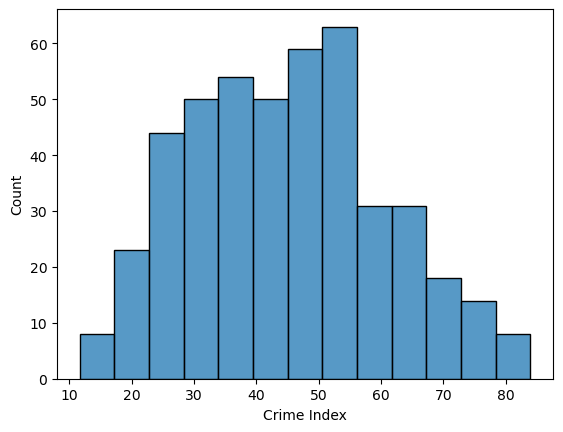

In [10]:
sns.histplot(x='Crime Index', data=crime, )
plt.show()

Now, we shall do a country wise analysis of the data, for that lets separate the data into cities and  countries.

In [11]:
### seperate City and Country for later Country aggregations
Country = crime['City']
Country = Country.str.split(',', expand = True)
### taking a look at the splits of City
Country.head()

,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


In [12]:
Country[2].value_counts()

 United States    58
 Canada            3
Name: 2, dtype: int64

So, we are basically getting a third column because USA and Caanada cities also have a province or state in their addresses. So, in these two cases column 1 is getting filled with the province/state and column 2 is having the country.
So, we need to clear this mess and have a single country column.

In [13]:
### fill all of the 'none' values in Country[2] with their values from Country[1]
Country[2] = Country[2].fillna(Country[1])
Country.head()

,0,1,2
0,Caracas,Venezuela,Venezuela
1,Pretoria,South Africa,South Africa
2,Celaya,Mexico,Mexico
3,San Pedro Sula,Honduras,Honduras
4,Port Moresby,Papua New Guinea,Papua New Guinea


Now, to minimize and reorganize columns...

In [14]:
### ensure "City" only contains the city, and make "Country" to contain the country
crime['City'] = Country[0]
crime['Country'] = Country[2]
### reorganize them in a better way
crime = crime[['Rank', 'City', 'Country', 'Crime Index', 'Safety Index']]
### ensure it looks right
crime.head()

,Rank,City,Country,Crime Index,Safety Index
0,1,Caracas,Venezuela,83.98,16.02
1,2,Pretoria,South Africa,81.98,18.02
2,3,Celaya,Mexico,81.80,18.20
3,4,San Pedro Sula,Honduras,80.87,19.13
4,5,Port Moresby,Papua New Guinea,80.71,19.29


Now our data is workable. For simplicity sake, we're going to make a new dataframe in which all records of a country are merged, giving us the average crime and safety index for that country. We'll call this new dataframe "countryindex".

In [19]:
### select the country (and use it as the index), crime index, and safety index
countryindex = crime[['Country','Crime Index','Safety Index']]
countryindex = countryindex.groupby('Country').mean()
### show how many countries are in the set, and check .head() to ensure it looks right
print("Number of Countries: ", countryindex.shape[0])
countryindex.head()

Number of Countries:  118


,Crime Index,Safety Index
Country,,
Afghanistan,79.390000,20.610000
Albania,44.500000,55.500000
Algeria,53.880000,46.120000
Angola,67.450000,32.550000
Argentina,66.273333,33.726667


Now let us sort this in descending order of Crime Index.

In [21]:
countryindex = countryindex.sort_values(by='Crime Index', ascending=False)
countryindex.head(10)

,Crime Index,Safety Index
Country,,
Venezuela,83.980000,16.020000
Honduras,80.870000,19.130000
Papua New Guinea,80.710000,19.290000
Afghanistan,79.390000,20.610000
South Africa,77.336667,22.663333
Trinidad And Tobago,76.210000,23.790000
Jamaica,71.440000,28.560000
Peru,70.700000,29.300000
El Salvador,69.790000,30.210000


So, here we have our top 10 countries in terms of crime index.

In [23]:
### create a dataframe of the top 10 countries with the highest crime index 
top10crime = countryindex.sort_values(by = ['Crime Index'], ascending = False)
top10crime = top10crime.head(10)
### create a dataframe of the top 10 countries with the highest safety index
top10safe = countryindex.sort_values(by = ['Safety Index'], ascending = False)
top10safe = top10safe.head(10)

Now, let's visualize each...

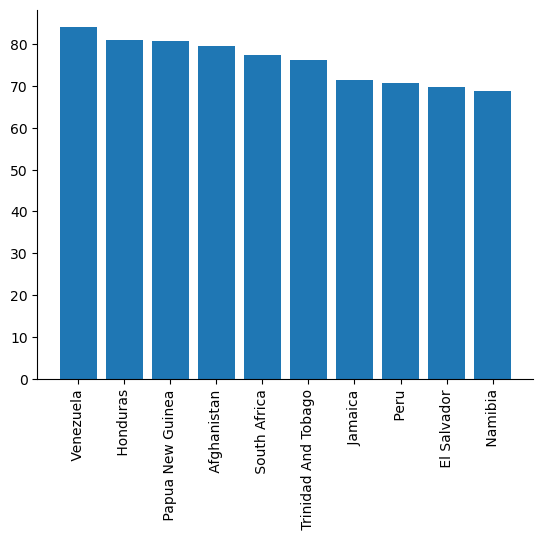

In [24]:
### top 10 highest crime index countries
plt.bar(top10crime.index, top10crime['Crime Index'])
### rotate x-axis names by 90 degrees
plt.xticks(rotation=90)
### remove the right axis and upper axis, for a cleaner look
sns.despine(top=True, right=True, left=False, bottom=False)
### show the plot
plt.show()

6 of the top 10 countries with the highest crime rates are in the Americas (Central America, South America, or the Caribbean), two of the countries are in Africa, one in the Middle East, and one in Maritime Southeast Asia.

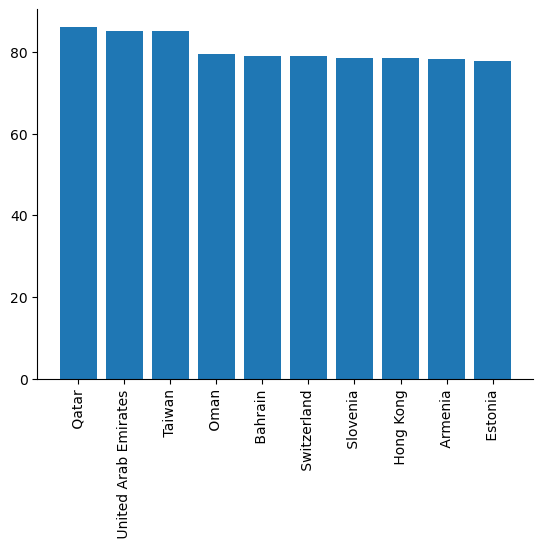

In [25]:
### top 10 highest safety index countries
plt.bar(top10safe.index, top10safe['Safety Index'])
### rotate country names by 90 degrees on the bottom axis
plt.xticks(rotation=90)
### remove the right and upper axis lines to clean the plot up
sns.despine(top=True, right=True, left=False, bottom=False)
### show the plot
plt.show()

4 of the 10 safest countries are in the Middle East, 4 are in Europe / Eurasia, and two are in East Asia.